## Question 1 - Comparing Accuracy of Cifar10 CNN to simple dense NN

In [3]:
# import libaries
import torch
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from __future__ import print_function
import os

import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.optimizers import legacy



In [4]:
# Load data, set parameters

batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# Generate model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
# train model

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# train model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by dataset std
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model_fit = model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

Using real-time data augmentation.


<ipython-input-6-1274eabc95c0>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fit = model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
98/98 [==============================] - 46s 328ms/step - loss: 2.1357 - accuracy: 0.2059 - val_loss: 1.9858 - val_accuracy: 0.2925
Epoch 2/10
98/98 [==============================] - 32s 323ms/step - loss: 1.9259 - accuracy: 0.3001 - val_loss: 1.7784 - val_accuracy: 0.3711
Epoch 3/10
98/98 [==============================] - 33s 323ms/step - loss: 1.8211 - accuracy: 0.3404 - val_loss: 1.7049 - val_accuracy: 0.3907
Epoch 4/10
98/98 [==============================] - 32s 312ms/step - loss: 1.7623 - accuracy: 0.3596 - val_loss: 1.6302 - val_accuracy: 0.4163
Epoch 5/10
98/98 [==============================] - 33s 324ms/step - loss: 1.7160 - accuracy: 0.3787 - val_loss: 1.6577 - val_accuracy: 0.3938
Epoch 6/10
98/98 [==============================] - 33s 331ms/step - loss: 1.6774 - accuracy: 0.3902 - val_loss: 1.5493 - val_accuracy: 0.4432
Epoch 7/10
98/98 [==============================] - 32s 320ms/step - loss: 1.6524 - accuracy: 0.3997 - val_loss: 1.5108 - val_accuracy: 0.4521

In [7]:
# save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# trained model scores
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.4565 - accuracy: 0.4724
Test loss: 1.456479549407959
Test accuracy: 0.4724000096321106


In [9]:
# Define a function to create and train dense neural networks
def dense_nn(hidden_layers, num_units, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers):
        model.add(Dense(num_units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        verbose=0)  # Set verbose to 0 to suppress training output
    return model, history

In [10]:
# Define the number of hidden layers and units for the dense networks
hidden_layers_list = [0, 1, 2, 3, 4]
num_units = 512
dropout_rate = 0.5

In [11]:
# Create a list to store models and histories
models = []
histories = []

# Create and train models for each configuration
for hidden_layers in hidden_layers_list:
    model, history = dense_nn(hidden_layers, num_units, dropout_rate)
    models.append(model)
    histories.append(history)


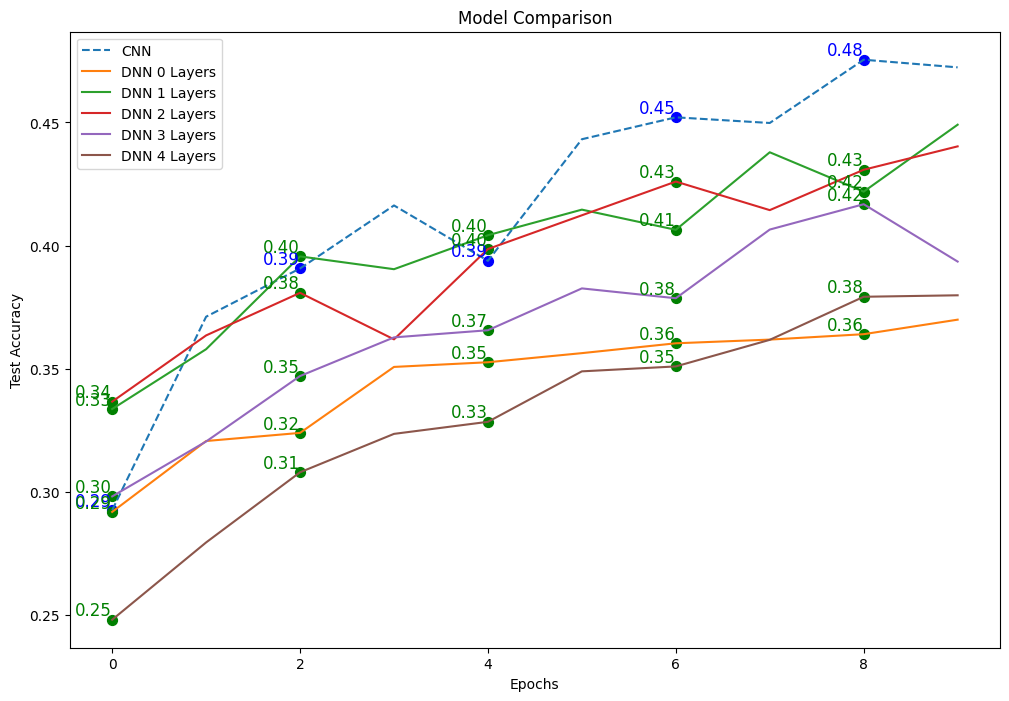

In [12]:
# Create a plot to compare model performances
plt.figure(figsize=(12, 8))
plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')

# Plot CNN performance with points and labels
plt.plot(model_fit.epoch, model_fit.history['val_accuracy'], linestyle='--', label='CNN')
plt.scatter(model_fit.epoch[::2], model_fit.history['val_accuracy'][::2], s=50, c='blue', marker='o')
for i, acc in enumerate(model_fit.history['val_accuracy'][::2]):
    plt.text(model_fit.epoch[2*i], acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', c='blue')

# Plot dense neural network performances with points and labels
for hidden_layers, history in zip(hidden_layers_list, histories):
    plt.plot(range(epochs), history.history['val_accuracy'], label=f'DNN {hidden_layers} Layers')
    plt.scatter(range(0, epochs, 2), history.history['val_accuracy'][::2], s=50, c='green', marker='o')
    for i, acc in enumerate(history.history['val_accuracy'][::2]):
        plt.text(2 * i, acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', c='green')

plt.legend()
plt.show()



The CNN likely performed better than the shallow dense networks because the CNN can capture spatial hierachies and local patterns better.

The CNN is a deeper network with 18 layers in total whereas when the dense network had the following layers for each number of hidden layers set:

Dense (0 hidden layers) = 2 total layers
Dense (1 hidden layer) = 4 total layers
Dense (2 hidden layers) = 7 total layers
Dense (3 hidden layers) = 10 total layers
Dense (4 hidden layers) = 13 total layers

Few layers may not capture complex patterns in the data. Too many can lead to overfitting however this is unlikely the case with this CNN.

For the CNN, the dropout rate of 0.25 in the intial layer, and the next set of convolutional layers and max pooling is appropriate to prevent overfitting. However for the DNNs, 0.5 might be too high since the DNNs are relatively shallow and might be why the CNN performed better.

After only 10 epochs we don't see much convergence with the simple dense neural networks and the CNN.

## Question 2 - Compare ReLU v Sigmoid

In [13]:
# sigmoid model
sig = Sequential()
sig.add(Conv2D(32, (3, 3), padding = 'same', input_shape=x_train.shape[1:]))
sig.add(Activation('sigmoid'))
sig.add(Conv2D(32, (3, 3)))
sig.add(Activation('sigmoid'))
sig.add(MaxPooling2D(pool_size=(2, 2)))
sig.add(Dropout(0.25))

sig.add(Conv2D(64, (3, 3), padding = 'same'))
sig.add(Activation('sigmoid'))
sig.add(Conv2D(64, (3, 3)))
sig.add(Activation('sigmoid'))
sig.add(MaxPooling2D(pool_size=(2, 2)))
sig.add(Dropout(0.25))

sig.add(Flatten())
sig.add(Dense(512))
sig.add(Activation('sigmoid'))
sig.add(Dropout(0.5))
sig.add(Dense(num_classes))
sig.add(Activation('softmax'))

#RMSprop Optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
sig.compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy'])

#Training the sigmoid model
sigmoid_train = sig.fit(x_train, y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  shuffle=True)

Epoch 1/10
98/98 [==============================] - 7s 55ms/step - loss: 2.3835 - accuracy: 0.1002 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 5s 47ms/step - loss: 2.3073 - accuracy: 0.1003 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 4s 45ms/step - loss: 2.3044 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 5s 46ms/step - loss: 2.3038 - accuracy: 0.0995 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 4s 46ms/step - loss: 2.3036 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 4s 46ms/step - loss: 2.3034 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 5s 47ms/step - loss: 2.3033 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 8/10
98

In [14]:
# save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
sig.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


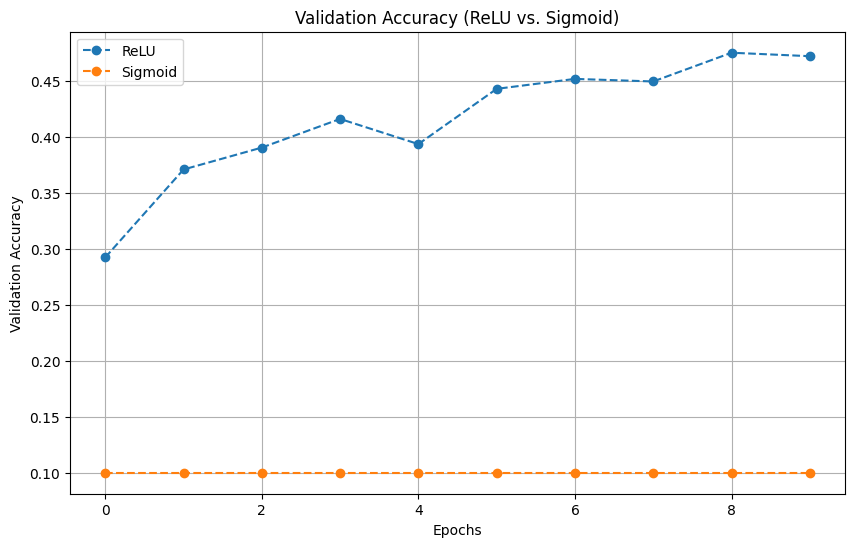

In [15]:
# Plotting the training accuracy comparison between ReLU and Sigmoid models
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy (ReLU vs. Sigmoid)')

plt.plot(model_fit.history['val_accuracy'], label='ReLU', linestyle='dashed', marker='o')
plt.plot(sigmoid_train.history['val_accuracy'], label='Sigmoid', linestyle='dashed', marker='o')

plt.legend()
plt.grid()
plt.show()

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.7304 - accuracy: 0.3798
Test loss: 1.730443000793457
Test accuracy: 0.3797999918460846


In [17]:
scores = sig.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.302638530731201
Test accuracy: 0.10000000149011612


The sigmoid activation CNN bounds the range of an output of a neuron between [0,1] which means it suffers from the vanishing gradient problem. This will cause difficulty in learning and updating weights effectively.

ReLU activation on the other hand passes through all positive values and so the ouput is the same as the input or 0 for negative input, allowing the model to train and converge faster and prevent experiencing the vanishing gradient problem.


## Question 3 - With/Without Dropout/Data Augmentation

####  With Data Augmentation (And Dropout)

In [18]:
# Generate model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
# train model

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# train model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=50,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by dataset std
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model_fit = model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=50,
            validation_data=(x_test, y_test),
            workers=4)

Using real-time data augmentation.


<ipython-input-19-4fae95362e82>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fit = model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/50
98/98 [==============================] - 35s 346ms/step - loss: 2.2810 - accuracy: 0.1360 - val_loss: 2.2135 - val_accuracy: 0.1930
Epoch 2/50
98/98 [==============================] - 34s 325ms/step - loss: 2.1628 - accuracy: 0.2131 - val_loss: 2.1012 - val_accuracy: 0.2384
Epoch 3/50
98/98 [==============================] - 41s 414ms/step - loss: 2.1199 - accuracy: 0.2289 - val_loss: 2.0694 - val_accuracy: 0.2491
Epoch 4/50
98/98 [==============================] - 33s 331ms/step - loss: 2.0971 - accuracy: 0.2397 - val_loss: 2.0404 - val_accuracy: 0.2622
Epoch 5/50
98/98 [==============================] - 33s 329ms/step - loss: 2.0791 - accuracy: 0.2436 - val_loss: 2.0210 - val_accuracy: 0.2712
Epoch 6/50
98/98 [==============================] - 34s 332ms/step - loss: 2.0611 - accuracy: 0.2526 - val_loss: 2.0354 - val_accuracy: 0.2624
Epoch 7/50
98/98 [==============================] - 33s 328ms/step - loss: 2.0433 - accuracy: 0.2595 - val_loss: 2.0013 - val_accuracy: 0.2735

### Data Augmentation (No Dropout)

In [20]:
# Define model
dataug_model = Sequential()
dataug_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
dataug_model.add(Activation('relu'))
dataug_model.add(Conv2D(32, (3, 3)))
dataug_model.add(Activation('relu'))
dataug_model.add(MaxPooling2D(pool_size=(2, 2)))
# dataug_model.add(Dropout(0.25))

dataug_model.add(Conv2D(64, (3, 3), padding='same'))
dataug_model.add(Activation('relu'))
dataug_model.add(Conv2D(64, (3, 3)))
dataug_model.add(Activation('relu'))
dataug_model.add(MaxPooling2D(pool_size=(2, 2)))
# dataug_model.add(Dropout(0.25))

dataug_model.add(Flatten())
dataug_model.add(Dense(512))
dataug_model.add(Activation('relu'))
# dataug_model.add(Dropout(0.5))
dataug_model.add(Dense(num_classes))
dataug_model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
dataug_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Using real-time data augmentation
print('Using real-time data augmentation.')
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0
)

datagen.fit(x_train)

#Training the sigmoid model
dataug_model_fit = dataug_model.fit(x_train, y_train,
                                  batch_size=batch_size,
                                  epochs=50,
                                  validation_data=(x_test, y_test),
                                  shuffle=True)

Using real-time data augmentation.
Epoch 1/50
98/98 [==============================] - 5s 41ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 3s 32ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
98/98 [==============================] - 3s 30ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
98/98 [==============================] - 3s 30ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
98/98 [==============================] - 3s 31ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
98/98 [==============================] - 3s 32ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
98/98 [==============================] - 3s 30ms/step - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3026 -

Drop Out (No Data Augmentation)

In [21]:
# Generate model
dropout_only = Sequential()
dropout_only.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
dropout_only.add(Activation('relu'))
dropout_only.add(Conv2D(32, (3, 3)))
dropout_only.add(Activation('relu'))
dropout_only.add(MaxPooling2D(pool_size=(2, 2)))
dropout_only.add(Dropout(0.25))

dropout_only.add(Conv2D(64, (3, 3), padding='same'))
dropout_only.add(Activation('relu'))
dropout_only.add(Conv2D(64, (3, 3)))
dropout_only.add(Activation('relu'))
dropout_only.add(MaxPooling2D(pool_size=(2, 2)))
dropout_only.add(Dropout(0.25))

dropout_only.add(Flatten())
dropout_only.add(Dense(512))
dropout_only.add(Activation('relu'))
dropout_only.add(Dropout(0.5))
dropout_only.add(Dense(num_classes))
dropout_only.add(Activation('softmax'))

# train model

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# train model using RMSprop
dropout_only.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

 # Fit the model on the batches generated by datagen.flow().
dropout_only_fit = dropout_only.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=50,
            validation_data=(x_test, y_test),
            workers=4)

<ipython-input-21-57448c371374>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  dropout_only_fit = dropout_only.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/50
98/98 [==============================] - 34s 330ms/step - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 33s 318ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
98/98 [==============================] - 33s 328ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
98/98 [==============================] - 33s 324ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
98/98 [==============================] - 31s 309ms/step - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
98/98 [==============================] - 33s 323ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
98/98 [==============================] - 33s 324ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000

No Drop Out, No Data Augmentation

In [22]:
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by dataset std
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).

In [23]:
# Generate model
no_do_no_da = Sequential()
no_do_no_da.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
no_do_no_da.add(Activation('relu'))
no_do_no_da.add(Conv2D(32, (3, 3)))
no_do_no_da.add(Activation('relu'))
no_do_no_da.add(MaxPooling2D(pool_size=(2, 2)))
# no_do_no_da.add(Dropout(0.25))

no_do_no_da.add(Conv2D(64, (3, 3), padding='same'))
no_do_no_da.add(Activation('relu'))
no_do_no_da.add(Conv2D(64, (3, 3)))
no_do_no_da.add(Activation('relu'))
no_do_no_da.add(MaxPooling2D(pool_size=(2, 2)))
# no_do_no_da.add(Dropout(0.25))

no_do_no_da.add(Flatten())
no_do_no_da.add(Dense(512))
no_do_no_da.add(Activation('relu'))
# no_do_no_da.add(Dropout(0.5))
no_do_no_da.add(Dense(num_classes))
no_do_no_da.add(Activation('softmax'))

# train model

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# train model using RMSprop
no_do_no_da.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Fit the model on the batches generated by datagen.flow().
no_do_no_da_fit = no_do_no_da.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=50,
            validation_data=(x_test, y_test),
            workers=4)

<ipython-input-23-22393b61b74b>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  no_do_no_da_fit = no_do_no_da.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/50
98/98 [==============================] - 33s 321ms/step - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 32s 319ms/step - loss: 2.3026 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
98/98 [==============================] - 32s 312ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
98/98 [==============================] - 32s 316ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
98/98 [==============================] - 31s 311ms/step - loss: 2.3026 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
98/98 [==============================] - 32s 316ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
98/98 [==============================] - 31s 310ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000

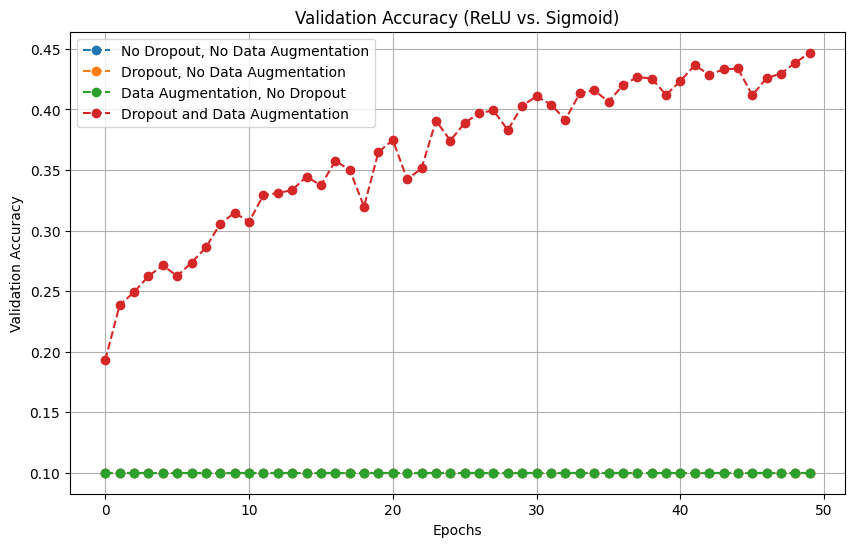

In [25]:
# Plotting the training accuracy comparison between dropout and data augmentation
plt.figure(figsize=(10, 6))
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy (Experimenting with Dropout and Data Augmentation)')

plt.plot(no_do_no_da_fit.history['val_accuracy'], label='No Dropout, No Data Augmentation', linestyle='dashed', marker='o')
plt.plot(dropout_only_fit.history['val_accuracy'], label='Dropout, No Data Augmentation', linestyle='dashed', marker='o')
plt.plot(dataug_model_fit.history['val_accuracy'], label='Data Augmentation, No Dropout', linestyle='dashed', marker='o')
plt.plot(model_fit.history['val_accuracy'], label='Dropout and Data Augmentation', linestyle='dashed', marker='o')


plt.legend()
plt.grid()
plt.show()

Model Complexity: The models (no_do_no_da_fit, dropout_only_fit, and dataug_model_fit) might be too simple or have insufficient capacity to capture the patterns in the data. They may underfit the training data, leading to consistently low validation accuracy.

Hyperparameter Tuning: The model's hyperparameters, such as learning rate, batch size, or regularization, might not be set optimally.

As the model_fit (Dropout + Data Augmentation) model approaches 50 epochs, we can see validation accuracy reaches almost 0.45.